In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from  datetime import datetime

#   DATA PRE-PROCESSING

In [2]:
df = pd.read_csv('netflix_project_dataset.csv', lineterminator="\n")

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


### check for duplicates

In [5]:
df.duplicated().sum()
# checking for duplicates 
# value 0 indicates there is no duplicates


np.int64(0)

In [6]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], shape=(2338,), dtype=object)

In [7]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [8]:
df['Vote_Count'].describe()


count     9827
unique    3267
top          0
freq       100
Name: Vote_Count, dtype: object

In [9]:
df['Popularity'].describe()


count    9827.000000
mean       40.320570
std       108.874308
min         7.100000
25%        16.127500
50%        21.191000
75%        35.174500
max      5083.954000
Name: Popularity, dtype: float64

In [10]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [11]:
print(df['Vote_Average'].dtype)

object


In [12]:
df['Vote_Average']= pd.to_numeric(df['Vote_Average'], errors='coerce')
print(df['Vote_Average'].dtype)


float64


In [13]:
df['Vote_Count']= pd.to_numeric(df['Vote_Count'], errors='coerce')
print(df['Vote_Count'].dtype)

float64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.8+ KB


In [15]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.000000,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,444.000000,6.500000
75%,35.174500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### deletion of unused columns

In [16]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url\r'],
      dtype='object')

In [17]:

cols = ['Overview', 'Original_Language','Poster_Url\r' ]
df.drop(cols  , axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

### converting date to datetime format from object format 

In [18]:
df['Release_Date']= pd.to_datetime(df['Release_Date']  , format='mixed' , errors='coerce' )

print(df['Release_Date'].dtype)
df['Release_Date'].head(3)

datetime64[ns]


0   2021-12-15
1   2022-01-03
2   2022-02-25
Name: Release_Date, dtype: datetime64[ns]

we only want to keep year , rest everything will be removed


In [19]:
df['Release_Date'] = df['Release_Date'].dt.year

print(df['Release_Date'].dtypes)

float64


In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,6.3,Thriller
3,2021.0,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


## categorizing Vote_Average column into labels like :
#### 'not_popular',  'below_avg', 'average', 'popular'

In [21]:
def categorize_col(df , col, labels ):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col]= pd.cut(df[col], edges, labels=labels , duplicates='drop')
    return df


In [22]:
labels = ['not_popular', 'below_avg','average', 'popular']

categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [23]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


In [24]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

## checking for missing values 


In [25]:
df.isna().sum()

Release_Date     10
Title             9
Popularity       10
Vote_Count       11
Vote_Average    111
Genre            11
dtype: int64

## dropping values with missing values 

In [26]:
df.dropna(inplace=True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [27]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122.0,below_avg,Thriller
3,2021.0,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


### now we splitting our genre into different rows , so that one row will have only one genre 

In [28]:
df['Genre']=df['Genre'].str.split(', ')
df= df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


In [29]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Crime', 'Mystery',
       'Thriller', 'Animation', 'Comedy', 'Family', 'Fantasy', 'War',
       'Horror', 'Drama', 'Music', 'Romance', 'Western', 'History',
       'TV Movie', 'Documentary'], dtype=object)

In [30]:
df['Genre']= df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [31]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  float64 
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(3), object(1)
memory usage: 849.4+ KB


# Data Visualization

In [33]:
sns.set_style('whitegrid')

## What is the most frequent genre of movies released on Netflix?


In [34]:
df['Genre'].value_counts()

Genre
Drama              3715
Comedy             3006
Action             2652
Thriller           2473
Adventure          1829
Romance            1461
Horror             1457
Animation          1425
Family             1405
Fantasy            1295
Science Fiction    1255
Crime              1235
Mystery             765
History             426
War                 307
Music               291
TV Movie            214
Documentary         203
Western             137
Name: count, dtype: int64

In [35]:
df['Genre'].describe()


count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [36]:
print("Most frequent Genre is :",df['Genre'].describe()['top'], 
      "\nwith count :",df['Genre'].describe()['freq'])

Most frequent Genre is : Drama 
with count : 3715


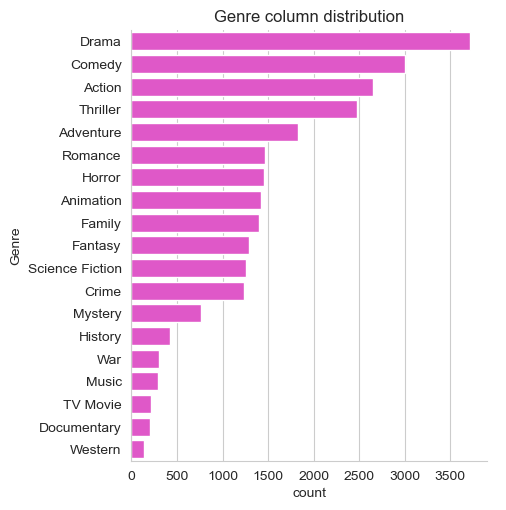

In [37]:
sns.catplot(y = 'Genre', data = df , kind = 'count',
            order = df['Genre'].value_counts().index,
            color = "#f542d7")

plt.title('Genre column distribution')
plt.show()

## Which Genre has highest votes ?


In [38]:
df['Vote_Average'].describe()['top']

'average'

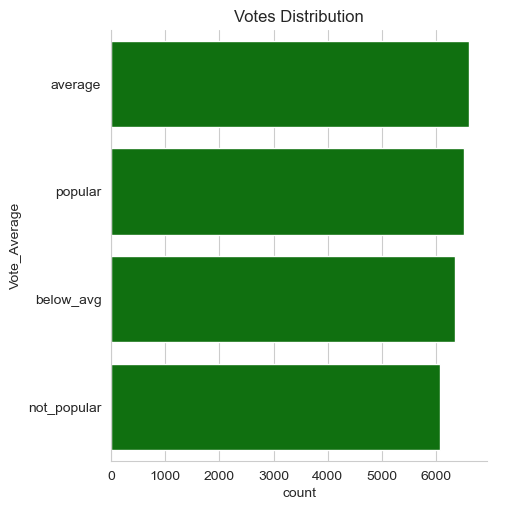

In [39]:
sns.catplot(y='Vote_Average', data= df , kind='count',
            order= df['Vote_Average'].value_counts().index,
            color= 'green')

plt.title('Votes Distribution')
plt.show()

In [40]:
Genre_Votes =df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)
Genre_Votes.head(1)

C:\Users\yasha\AppData\Local\Temp\ipykernel_5372\2611269223.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Genre_Votes =df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending=False)


Genre
Drama    5141495.0
Name: Vote_Count, dtype: float64

# What movie got the highest popularity? what's its genre?


In [41]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022.0,The Batman,3827.658,1151.0,popular,Crime
4,2022.0,The Batman,3827.658,1151.0,popular,Mystery


In [42]:
df['Popularity'].describe()

count    25551.000000
mean        41.972953
std        113.760723
min         13.354000
25%         16.363000
50%         21.844000
75%         36.461000
max       5083.954000
Name: Popularity, dtype: float64

In [43]:
df['Popularity'].max()

5083.954

In [44]:
df[df['Popularity']== df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021.0,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction


In [45]:
k =df[df['Popularity']== df['Popularity'].max()]
print(k['Genre'])

0             Action
1          Adventure
2    Science Fiction
Name: Genre, dtype: category
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']


# What movie got the lowest popularity? what's its genre?


In [46]:
df['Popularity'].min()

13.354

In [47]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,Music
25546,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,Drama
25547,2021.0,The United States vs. Billie Holiday,13.354,152.0,average,History
25548,1984.0,Threads,13.354,186.0,popular,War
25549,1984.0,Threads,13.354,186.0,popular,Drama
25550,1984.0,Threads,13.354,186.0,popular,Science Fiction


In [48]:
l = df[df['Popularity'] == df['Popularity'].min()]
print(l['Genre'])

25545              Music
25546              Drama
25547            History
25548                War
25549              Drama
25550    Science Fiction
Name: Genre, dtype: category
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']


## Which year has the most filmed movies?


In [49]:
df['Release_Date'].describe()

count    25551.000000
mean      2005.869516
std         15.486277
min       1902.000000
25%       2000.000000
50%       2010.000000
75%       2017.000000
max       2022.000000
Name: Release_Date, dtype: float64

In [50]:
df['Release_Date'].max()

2022.0

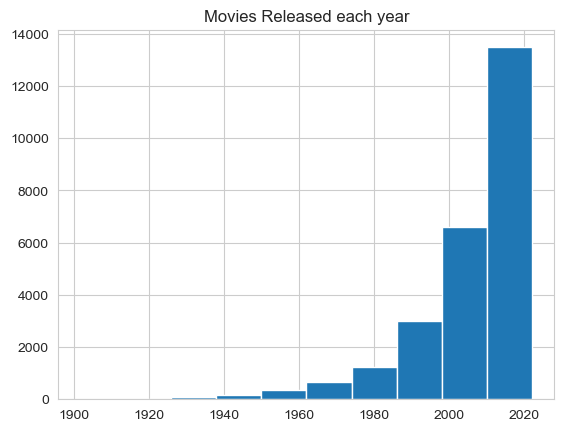

In [51]:
df['Release_Date'].hist()

plt.title('Movies Released each year')
plt.show()

#  SUMMARY

(Q1)     What is the most frequent genre of movies released on Netflix?

(ans)    Most frequent Genre is drama among a 19 genre categories.



(Q2) Which Genre has highest votes ?

(Ans) Drama

(Q3) What movie got the highest popularity? what's its genre?

(Ans) Movie which got highest popularity was Spider-Man: No Way Home
        and it genre was action , adventure and science fiction.

(Q4) What movie got the lowest popularity? what's its genre?

(Ans) Movies with least popularity are :
        The United States vs. Billie Holiday(Genre: Music, drama , history),
        
        Threads(Genre: Science Fiction , Crime , mystery)

        

(Q5) Which year has the most filmed movies?

(Ans) 2022